In [300]:
#%pip install seaborn
#%pip install pandas
#%pip install numpy
#%pip install zipfile
import requests
import pandas as pd
import numpy as np
import datetime
import os
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [301]:
#List of countries and regions are here: https://unstats.un.org/unsd/methodology/m49/overview/ but website using
#javascript and not providing link for csv file directly
#Workaround:
#Using a github page to download a csv file
url = "https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/raw/master/all/all.csv"
filename = "countries.csv"

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as file:
        file.write(response.content)
    print("CSV file downloaded successfully.")
else:
    print("Failed to download the CSV file.")

CSV file downloaded successfully.


In [302]:
df_countries=pd.read_csv("countries.csv")

In [303]:
#To find a file of your interest: https://data.worldbank.org/indicator
#Clicking on a subset allows to get address to download csv-file

#These are addresses to obtain the data for GDP per capita, life expectancy and literacy rate
url_list=["https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.PP.CD?downloadformat=csv", \
          "https://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=csv",\
            "https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.ZS?downloadformat=csv"]

In [304]:
#Also, giving names for the data to be obtained
data_list=["gdp_per_capita", "life_expectancy", "literacy"]

In [305]:
#First, making folder to download the data from web, names based on data_list
for d in data_list:
    if not os.path.exists(d):
        os.makedirs(d)
    if not os.path.exists(d+"_unpacked"):
        os.makedirs(d+"_unpacked")

In [306]:
#Here one by one, I dowload the data and put into a right folder
for d, u in zip(data_list, url_list):
    response = requests.get(u)
    if response.status_code == 200:
        with open(d+"/"+d+".zip", "wb") as file:
            file.write(response.content)
        print("Zip file downloaded successfully!")
    else:
        print("Failed to retrieve the zip file.")

Zip file downloaded successfully!
Zip file downloaded successfully!
Zip file downloaded successfully!


In [307]:
#Unpacking the data as well
for d in data_list:
    zip_file_path=d+"/"+d+".zip"
    destination_folder=d+"_unpacked"
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
    print("Extraction completed!")


Extraction completed!
Extraction completed!
Extraction completed!


In [308]:
#To remove excess rows in the csv file, an additional method:
def copy_file(source_file, destination_file):
    with open(source_file, 'r') as source:
        with open(destination_file, 'w') as destination:
            counter=0
            for line in source:
                if(counter>3):
                    destination.write(line)
                counter=counter+1

In [309]:
#Removing extra rows from the csv file:
for d in data_list:
    file_list=os.listdir(d+"_unpacked")
    file_list.sort()
    source_file=d+"_unpacked/"+file_list[0]
    destination_file=d+".csv"
    copy_file(source_file, destination_file)

In [310]:
#Using pandas, going to create the dataframe list:
df_list=[]
for d in data_list:
    temp_df=pd.read_csv(d+".csv")
    df_list.append(temp_df)

In [311]:
#The last column is empty, must be removed
df_list[0].head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36846.848285,37343.912963,37583.840323,38865.188195,41679.238190,42501.641554,34971.009913,42698.359872,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3470.550675,3498.125396,3591.099809,3635.564622,3724.868177,3777.972368,3621.058106,3839.470058,NaN,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4143.177054,4075.994459,3998.951876,4045.303263,4160.540965,4264.731035,4174.504565,4409.450961,NaN,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8123.048065,7274.090475,7027.146634,7216.061373,7042.923829,6881.076241,6362.636076,6491.125578,NaN,NaN


In [312]:
#Running the deletion
for n in range(len(df_list)):
    df_list[n]=df_list[n][df_list[n].columns[:-2]]

In [313]:
#Checking
df_list[0].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,34786.593993,36932.184164,36846.848285,37343.912963,37583.840323,38865.188195,41679.238190,42501.641554,34971.009913,42698.359872
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3208.016619,3333.520911,3470.550675,3498.125396,3591.099809,3635.564622,3724.868177,3777.972368,3621.058106,3839.470058
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1958.447627,2062.059176,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3801.052234,3950.948889,4143.177054,4075.994459,3998.951876,4045.303263,4160.540965,4264.731035,4174.504565,4409.450961
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7389.314960,7643.921944,8123.048065,7274.090475,7027.146634,7216.061373,7042.923829,6881.076241,6362.636076,6491.125578


In [314]:
#Here I extract regions and sub-region from countries file and renaming a column
df_countries_small=df_countries[["name","region","sub-region"]]
df_countries_small = df_countries_small.rename(columns={'name': 'Country Name'})

In [315]:
#Conducting merge on country names
#For gdp per capita
df_gdppcap=df_countries_small.merge(df_list[0], on='Country Name', how='inner')
#For life expectancy
df_lifeexp=df_countries_small.merge(df_list[1], on='Country Name', how='inner')
#For literacy
df_literacy=df_countries_small.merge(df_list[2], on='Country Name', how='inner')

##These are the dataframes one can work now!


In [316]:
#To get literacy values for year 2021, replacing NaN with np.nan
df_literacy=df_literacy.replace('NaN',np.nan)
#Filling np.nan with closest value to the left
df_literacy=df_literacy.ffill(axis=1)
df_literacy.head()

,Country Name,region,sub-region,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,Asia,Southern Asia,AFG,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,...,31.448851,31.448851,31.448851,31.448851,31.448851,31.448851,31.448851,31.448851,31.448851,37.266041
1,Albania,Europe,Southern Europe,ALB,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,...,97.246971,97.246971,97.246971,97.246971,97.246971,97.246971,98.141151,98.141151,98.141151,98.449997
2,Algeria,Africa,Northern Africa,DZA,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,...,75.136047,75.136047,75.136047,75.136047,75.136047,75.136047,81.407837,81.407837,81.407837,81.407837
3,American Samoa,Oceania,Polynesia,ASM,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,...,97.344162,97.344162,97.344162,97.344162,97.344162,97.344162,97.344162,97.344162,97.344162,97.344162
4,Andorra,Europe,Southern Europe,AND,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,...,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS,SE.ADT.LITR.ZS


In [317]:
#Getting values to year 2021
df_literacy_2021=df_literacy[['Country Name','region','sub-region','2021']]
df_literacy_2021.head()

,Country Name,region,sub-region,2021
0,Afghanistan,Asia,Southern Asia,37.266041
1,Albania,Europe,Southern Europe,98.449997
2,Algeria,Africa,Northern Africa,81.407837
3,American Samoa,Oceania,Polynesia,97.344162
4,Andorra,Europe,Southern Europe,SE.ADT.LITR.ZS


In [318]:
#One more change-removing these rows, where literacy could not be extrapolated
df_literacy_2021=df_literacy_2021[pd.to_numeric(df_literacy_2021['2021'], errors='coerce').notna()]
df_literacy_2021.head()

,Country Name,region,sub-region,2021
0,Afghanistan,Asia,Southern Asia,37.266041
1,Albania,Europe,Southern Europe,98.449997
2,Algeria,Africa,Northern Africa,81.407837
3,American Samoa,Oceania,Polynesia,97.344162
5,Angola,Africa,Sub-Saharan Africa,72.279999


In [319]:
#Getting gdp per capita for 2021
#To get literacy values for year 2021, replacing NaN with np.nan
df_gdppcap=df_gdppcap.replace('NaN',np.nan)
#Getting for year 2021
df_gdppcap_2021=df_gdppcap[['Country Name','2021']]
#Removing these rows, where np.nan
df_gdppcap_2021=df_gdppcap_2021.dropna()

In [320]:
#Merging gdppcap_2021 with literacy_2021
df_gdppcap_literacy_2021=df_literacy_2021.merge(df_gdppcap_2021, on='Country Name', how='inner')
df_gdppcap_literacy_2021.head()


,Country Name,region,sub-region,2021_x,2021_y
0,Afghanistan,Asia,Southern Asia,37.266041,1665.805842
1,Albania,Europe,Southern Europe,98.449997,15814.411571
2,Algeria,Africa,Northern Africa,81.407837,12128.274991
3,Angola,Africa,Sub-Saharan Africa,72.279999,6491.125578
4,Antigua and Barbuda,Americas,Latin America and the Caribbean,98.949997,21010.003574


In [321]:
df_gdppcap_literacy_2021 = df_gdppcap_literacy_2021.rename(columns={'2021_x': 'Literacy', '2021_y':'GDPPCAP'})
df_gdppcap_literacy_2021.head()

,Country Name,region,sub-region,Literacy,GDPPCAP
0,Afghanistan,Asia,Southern Asia,37.266041,1665.805842
1,Albania,Europe,Southern Europe,98.449997,15814.411571
2,Algeria,Africa,Northern Africa,81.407837,12128.274991
3,Angola,Africa,Sub-Saharan Africa,72.279999,6491.125578
4,Antigua and Barbuda,Americas,Latin America and the Caribbean,98.949997,21010.003574


[Text(0.5, 1.0, 'GDP per Capita vs Literacy in 2021')]

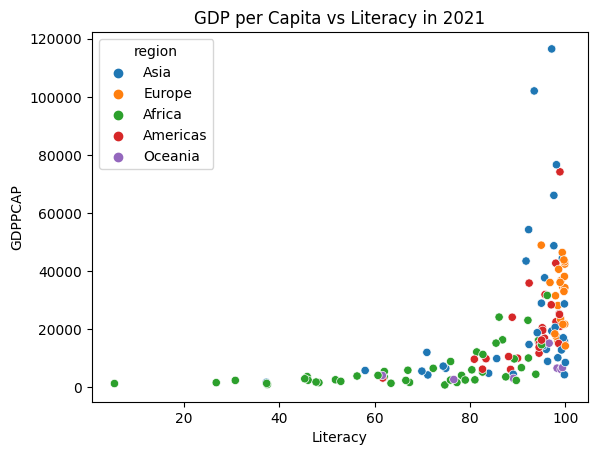

In [365]:
sns.scatterplot(x="Literacy",
                    y="GDPPCAP",
                    data=df_gdppcap_literacy_2021, hue='region').set(title='GDP per Capita vs Literacy in 2021')

In [323]:
#Here I want to extract only country and values for each year
#Extract years from column names
years=list(df_gdppcap.columns)[6:]
#A trick to add 'Country name' as a wanted column
Country=['Country Name']
#Extraction itself
df_gdppcap_country=df_gdppcap[Country+years]

In [324]:
#Checking progress
df_gdppcap_country.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1958.447627,2062.059176,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10526.250106,10570.966045,11259.303681,11658.894897,12078.799334,12770.987862,13498.196119,14407.460749,14035.354780,15814.411571
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13347.362795,13104.737104,13058.124574,12071.814181,11685.451418,11809.483033,12006.010238,12118.004500,11438.691156,12128.274991
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
df_gdppcap_country=df_gdppcap_country.dropna(subset=years, how='all')

In [331]:
#Also making a dataframe for sub-regions and taking average for each year
df_gdppcap_subregion=df_gdppcap.groupby(['sub-region'])[years].mean().reset_index()


In [332]:
#Such process would necessary for lineplot, melting
df_gdppcap_subregion.melt(id_vars=['sub-region'])

,sub-region,variable,value
0,Australia and New Zealand,1960,NaN
1,Central Asia,1960,NaN
2,Eastern Asia,1960,NaN
3,Eastern Europe,1960,NaN
4,Latin America and the Caribbean,1960,NaN
...,...,...,...
1049,Southern Asia,2021,9083.074522
1050,Southern Europe,2021,31544.496640
1051,Sub-Saharan Africa,2021,5823.328401
1052,Western Asia,2021,37677.149857


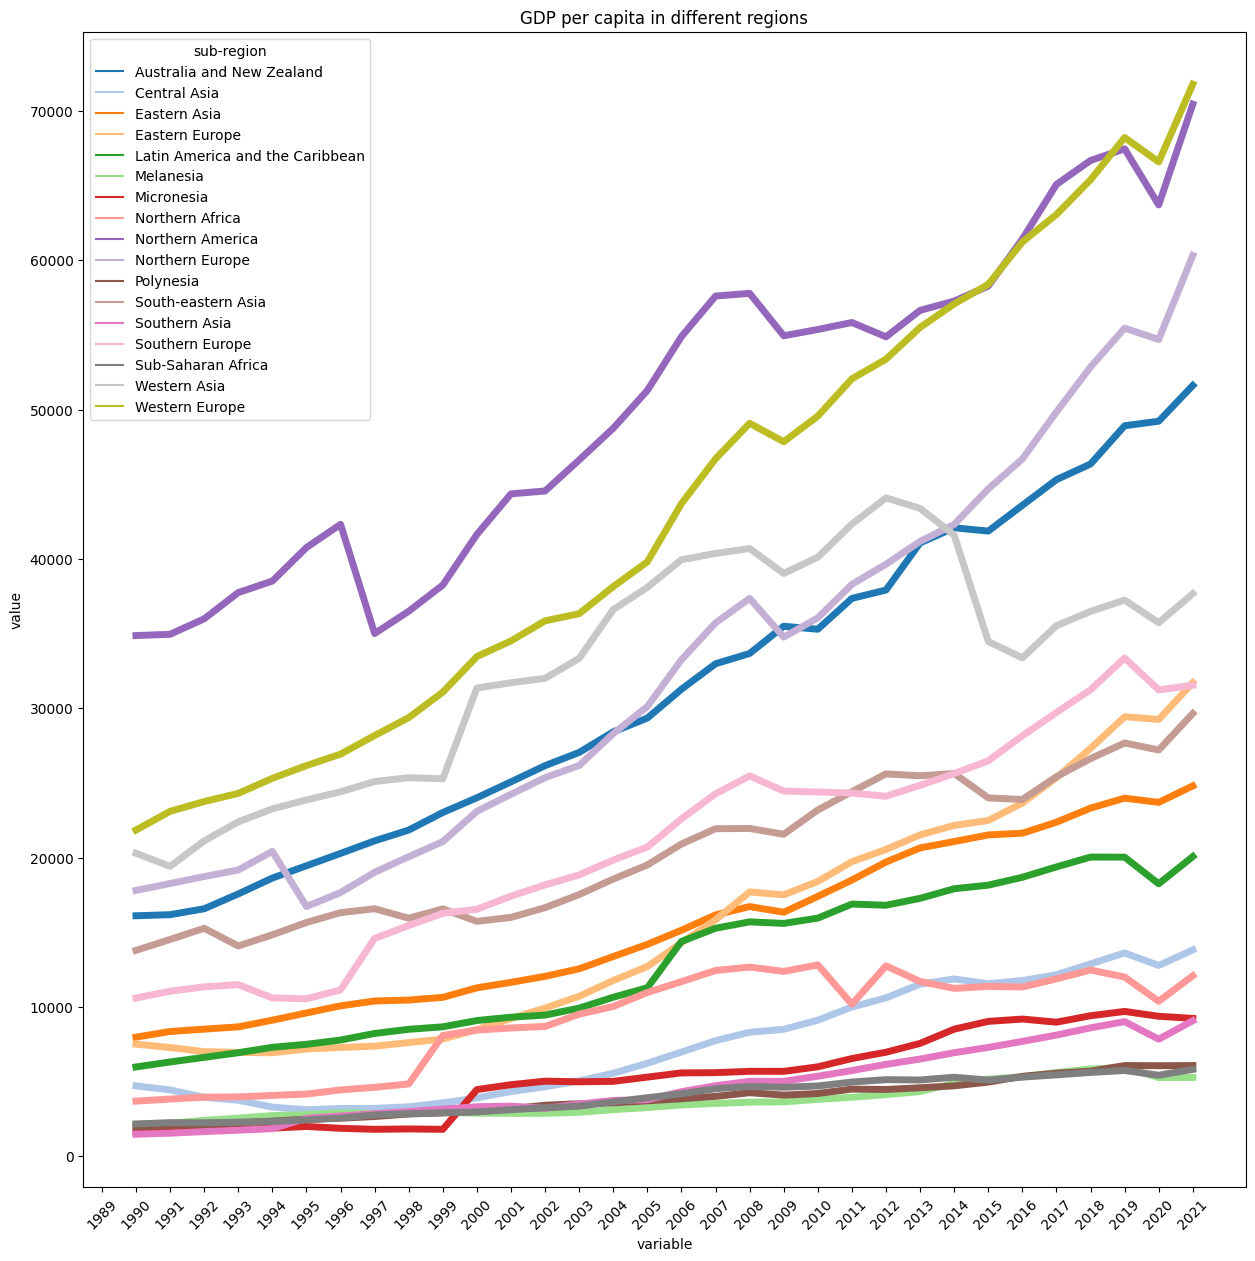

In [366]:
#The dataframe has to be melted
plt.figure(figsize=(15, 15))

sns.lineplot(data=df_gdppcap_subregion.melt(id_vars=['sub-region']), 
             x='variable', y='value', hue='sub-region', palette='tab20',lw=5).set(title='GDP per capita in different regions')

plt.xticks(rotation=45)

#No extra text as output, thus 'None' needed
None
